In [133]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [134]:
import tensorflow as tf

# 1. Feedward: Building a ReLU neural network

## 1.1 Draw a network with 2 inputs, 1 hidden layers with 4 hidden units and a 1-class output for binary classfication.

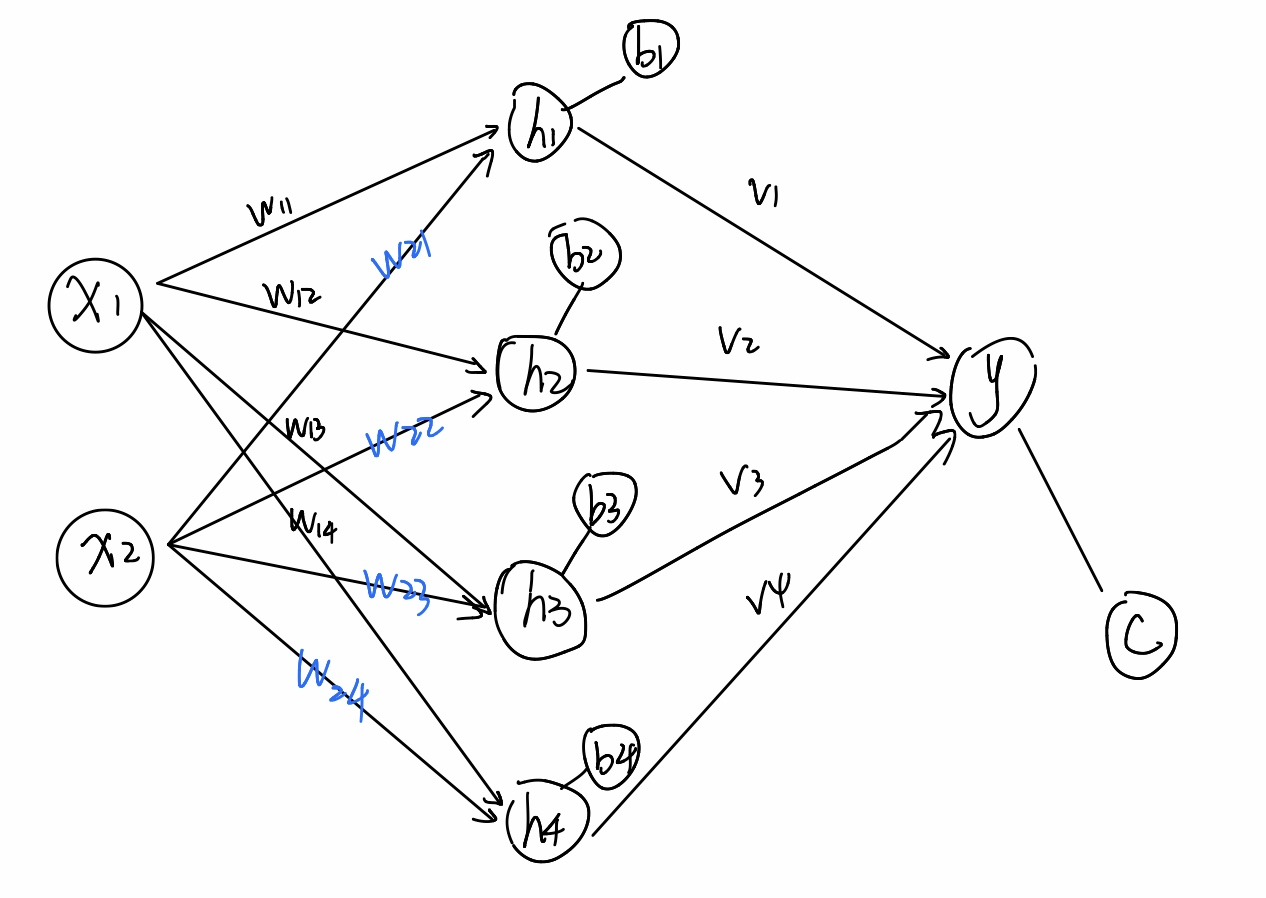

## 1.2 Write out the mathematical equation for the output of this network.

h1 = 𝑓(𝑤11𝑥1+𝑤21𝑥2+𝑏1) = 𝑚𝑎𝑥(0,𝑤11𝑥1+𝑤21𝑥2+𝑏1)

h2 = 𝑓(𝑤12𝑥1+𝑤22𝑥2+𝑏2) = 𝑚𝑎𝑥(0,𝑤12𝑥1+𝑤22𝑥2+𝑏2)

h3 = 𝑓(𝑤13𝑥1+𝑤23𝑥2+𝑏3) = 𝑚𝑎𝑥(0,𝑤13𝑥1+𝑤23𝑥2+𝑏3)

h4 = 𝑓(𝑤14𝑥1+𝑤24𝑥2+𝑏4) = 𝑚𝑎𝑥(0,𝑤14𝑥1+𝑤24𝑥2+𝑏4)

y = 𝑔(𝑣1ℎ1+𝑣2ℎ2+𝑣3ℎ3+𝑣4ℎ4+𝑐)

$y = \frac{1}{1+𝑒^{-(𝑣1ℎ1+𝑣2ℎ2+𝑣3ℎ3+𝑣4ℎ4+𝑐)}}$



## 1.3 Write out the forward-pass function in python, call it ffnn ReLu.

In [135]:
def nn_layer(x, w, b, f):
    return f(tf.tensordot(x, w, axes = 1) + b)

def nn_2layers(x, params, f_hidden, f_out):
    h = nn_layer(x, params[0], params[1], f_hidden)
    y_hat = nn_layer(h, params[2], params[3], f_out)
    return y_hat

## 1.4 What are the class probabilities associated with the forward pass of each sample?

In [136]:
X = tf.constant([[1, -1], [0, -1], [0, 1]], dtype = tf.float32) 
W1 = tf.constant([[1, -1, 0, 1], [0, 0, 0.5, 1]], dtype = tf.float32) 
b1 = tf.constant([0, 0, 1, 0], dtype = tf.float32) 
W2 = tf.constant([1, 0, -1, 1], dtype = tf.float32) 
b2 = tf.constant([1], dtype = tf.float32) 

yhat = nn_2layers(X, [W1, b1, W2, b2], tf.nn.relu, tf.nn.sigmoid)
print(yhat.numpy().squeeze())

[0.81757444 0.6224593  0.6224593 ]


#The probabilities with the forward pass of each sample is 0.82, 0.62, 0.62.

# 2. Gradient Descent

## 2.1 What are the partial derivaties of f with respect to x and to y?

$\frac{df}{dx} = −3𝑥^2+100𝑥−200𝑦^2$

$\frac{df}{dx} = 800𝑦^3−400𝑥𝑦$

## 2.2 Create a visualization of the contours of this function.

In [137]:
def f(x,y):
    return (3-x**3)+ 50*(2*y**2 - x**2)**2
x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
X,Y = np.meshgrid(x,y)
Z=f(X,Y)

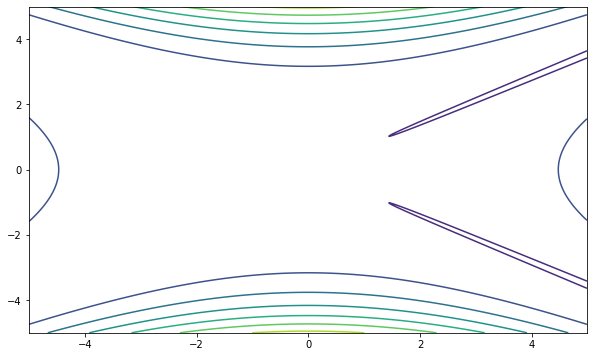

In [138]:
plt.figure(figsize=(10,6))
plt.contour(X,Y,Z)

## 2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [160]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * (x ** 2) + 100 * x - 200 * (y ** 2)
    df_dy = 800 * (y ** 3) - 400 * x * y
    return np.array([df_dx, df_dy])

In [161]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
        
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


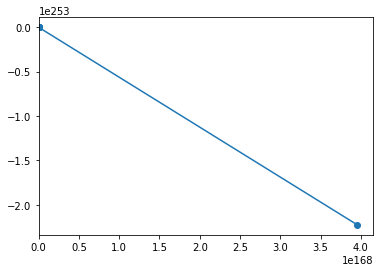

In [166]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y,'-o')

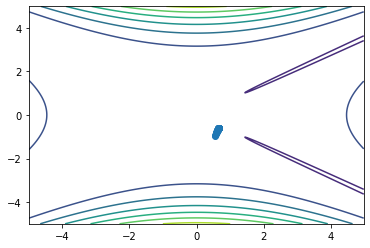

In [167]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y,'-o')

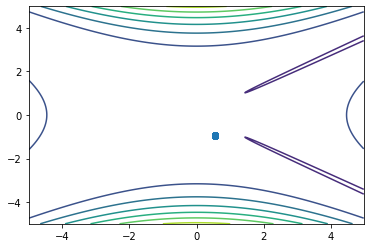

In [169]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y,'-o')

## 2.4 Write a Gradient Descent with Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [170]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations): 
        v = v*alpha + grad_f(point)*epsilon
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhouyihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


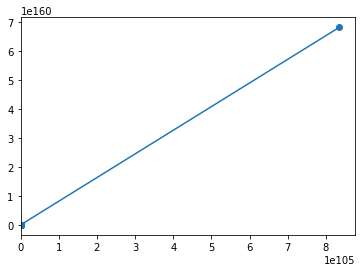

In [171]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.9,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

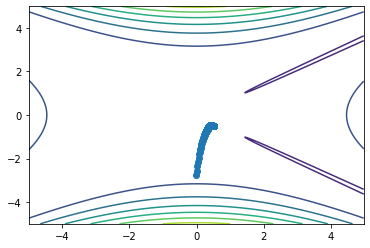

In [172]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.5,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

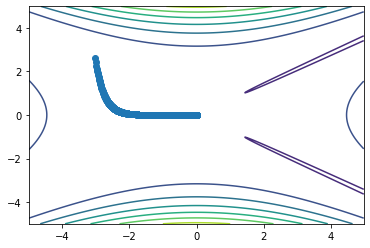

In [173]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.1,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3. Backprop

## 3.1 For the same network as in Q1, derive expressions of the gradient of the loss function with respect to each of the model parameters.

## 3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [178]:
def ff_nn_new(X,params):
    h = tf.nn.relu(tf.matmul(params[0],X)+params[1])
    return tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])
loss = tf.keras.losses.BinaryCrossentropy()

In [179]:
def grad_f(X,Y,params):
    with tf.GradientTape() as tape:
        y_hat = ff_nn_new(X,params)
        f = loss(Y,y_hat)
    print(tape.gradient(f,params))

In [180]:
W = tf.random.uniform((4, 2), minval=-1, maxval=1)
B = tf.random.uniform((4, 1), minval=-1, maxval=1)
V = tf.random.uniform((1, 4), minval=-1, maxval=1)
C = tf.random.uniform((1,), minval=-1, maxval=1)
X = tf.random.uniform((2,3), minval=-2, maxval=2)
Y = tf.constant([0,0,1])
params = [tf.Variable(p) for p in [W,B,V,C]]

In [181]:
 grad_f(X,Y,params)

[<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.00064668, -0.01706629],
       [ 0.0005917 , -0.00142866],
       [ 0.        ,  0.        ],
       [-0.07761329,  0.18739796]], dtype=float32)>, <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.3061877e-02],
       [ 6.3995481e-05],
       [ 0.0000000e+00],
       [-8.3943456e-03]], dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.10475776, -0.12441692,  0.        , -0.04898622]],
      dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00961035], dtype=float32)>]


## 3.3 Generate a synthetic dataset like the XOR pattern (see below).

In [185]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

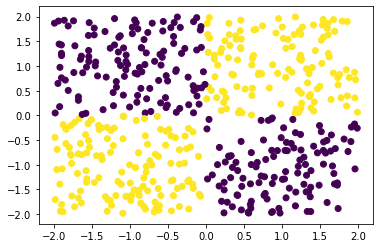

In [186]:
plt.scatter(x[:,0],x[:,1],c=y)

## 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [187]:
def grad_step(X,Y,params,step_size):
    with tf.GradientTape() as tape:
        y_hat = ff_nn_new(X,params)
        f = loss(Y,y_hat)
    grads = tape.gradient(f,params)
    for var,grad in zip(params,grads):
        var.assign(var - step_size*grad)
    return f

In [190]:
def grad_desc(X,Y,params,step_size,n_iters):
    X = tf.Variable(X)
    Y = tf.Variable(Y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    for i in range(n_iters):
        losses.append(grad_step(X,Y,params,step_size))  
    return losses,params 

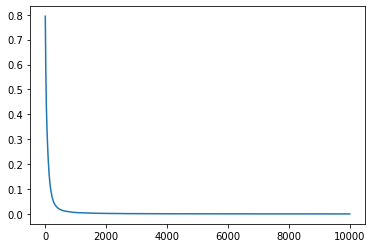

In [191]:
losses,params = grad_desc(X,Y,params,0.1,10000)
plt.plot(losses)
plt.show()

## 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [194]:
def grad_step_mome(X,Y,params,alpha, epsilon,v):
    with tf.GradientTape() as tape:
        y_hat=ff_nn_new(X,params)
        f = loss(Y,y_hat)
    grads=tape.gradient(f,params)
    for var,grad,a in zip(params,grads,v):
        a=alpha*a + epsilon*grad
        var.assign(var-a)
    return f

In [197]:
def grad_desc_mome(X,Y,params,alpha, epsilon,n_iters):
    X = tf.Variable(X)
    Y = tf.Variable(Y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    v=tf.zeros(17)
    for i in range(n_iters):
        losses.append(grad_step_mome(X,Y,params,alpha, epsilon,v))  
    return losses,params

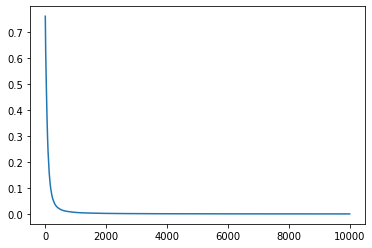

In [198]:
losses,params =grad_desc_mome(X,Y,params,0.9,0.1,10000)
plt.plot(losses)
plt.show()

## 3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [211]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)

ValueError: not enough values to unpack (expected 17, got 2)